In [1]:
%%capture
!pip install pandas
!pip install ruptures
!pip install numpy
!pip install matplotlib

!pip install saxpy
!pip install tsfresh
!pip install seaborn
!pip install sklearn
!pip3 install -U scikit-learn scipy matplotlib




# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math
from scipy import stats
from scipy.signal import find_peaks, spectrogram

# packages for visualizations
import matplotlib.dates as mdates
import seaborn as sns

from matplotlib import pyplot as plt

# package for feature training

# sklearn packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans


from sklearn.impute import SimpleImputer

%matplotlib inline



In [2]:

# import gzip
# import shutil


# file_path = './MAC000002_data.csv'

# df=pd.read_csv(file_path)

# df

alldata = pd.read_csv("./CC_LCL-FullData_without_stdorToU.csv")
print('A sample of household IDs:', alldata.LCLid.unique()[:10])
household = "MAC000002"


df = alldata[alldata["LCLid"] == household ]
df.reset_index(drop=True, inplace=True)
print(df.head())


# # Read the compressed CSV file back into a DataFrame
# with gzip.open('./CC_LCL-FullData_without_stdorToU.csv.gz', 'rt', encoding='utf-8') as f:
#     df = pd.read_csv(f)

# # Now df_hourly_compressed contains the data from the compressed file


A sample of household IDs: ['MAC000002' 'MAC000003' 'MAC000004' 'MAC000006' 'MAC000007' 'MAC000008'
 'MAC000009' 'MAC000010' 'MAC000011' 'MAC000012']
       LCLid                     DateTime KWH/hh (per half hour) 
0  MAC000002  2012-10-12 00:30:00.0000000                      0 
1  MAC000002  2012-10-12 01:00:00.0000000                      0 
2  MAC000002  2012-10-12 01:30:00.0000000                      0 
3  MAC000002  2012-10-12 02:00:00.0000000                      0 
4  MAC000002  2012-10-12 02:30:00.0000000                      0 


In [3]:
df = df[df['KWH/hh (per half hour) '] != 0]
df['KWH/hh (per half hour) '].dropna()


df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

# Remove rows where "KWH/hh (per half hour)" is equal to or close to zero
df = df[df['KWH/hh (per half hour) '] != 0]
df

,LCLid,DateTime,KWH/hh (per half hour)
21,MAC000002,2012-10-12 11:30:00.0000000,0.143
22,MAC000002,2012-10-12 12:00:00.0000000,0.663
23,MAC000002,2012-10-12 12:30:00.0000000,0.256
24,MAC000002,2012-10-12 13:00:00.0000000,0.155
25,MAC000002,2012-10-12 13:30:00.0000000,0.199
...,...,...,...
24153,MAC000002,2014-02-27 22:30:00.0000000,1.350
24154,MAC000002,2014-02-27 23:00:00.0000000,1.247
24155,MAC000002,2014-02-27 23:30:00.0000000,1.218
24156,MAC000002,2014-02-28 00:00:00.0000000,1.387


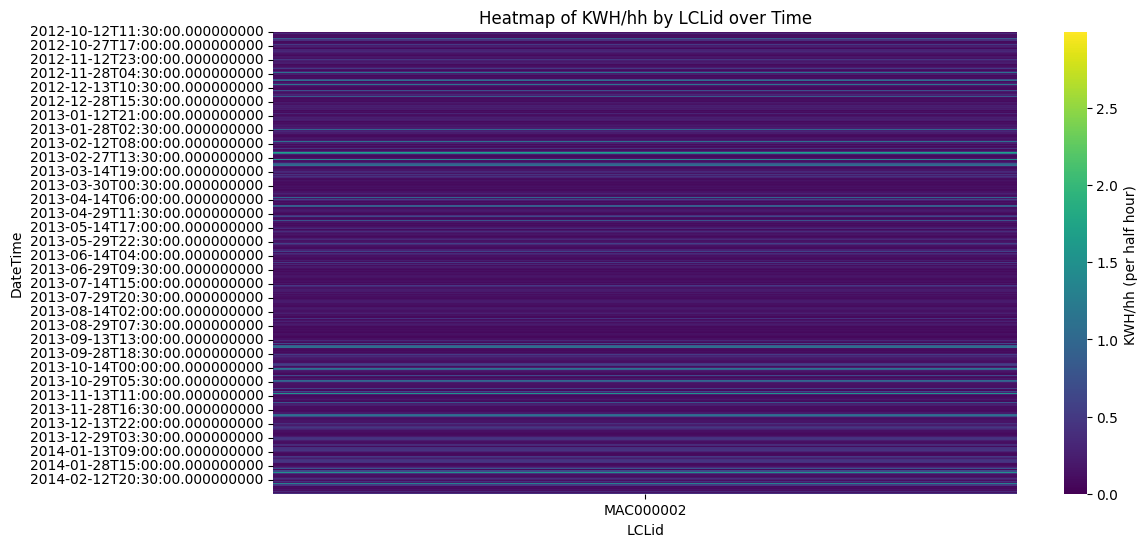

In [4]:
df['KWH/hh (per half hour) '] = pd.to_numeric(df['KWH/hh (per half hour) '], errors='coerce')

df['DateTime'] = pd.to_datetime(df['DateTime'])

heatmap_data = df.pivot_table(index='DateTime', columns='LCLid', values='KWH/hh (per half hour) ', aggfunc='sum')

heatmap_data = heatmap_data.dropna(axis=0, how='all')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'KWH/hh (per half hour) '})

plt.xlabel('LCLid')
plt.ylabel('DateTime')
plt.title('Heatmap of KWH/hh by LCLid over Time')

plt.show()

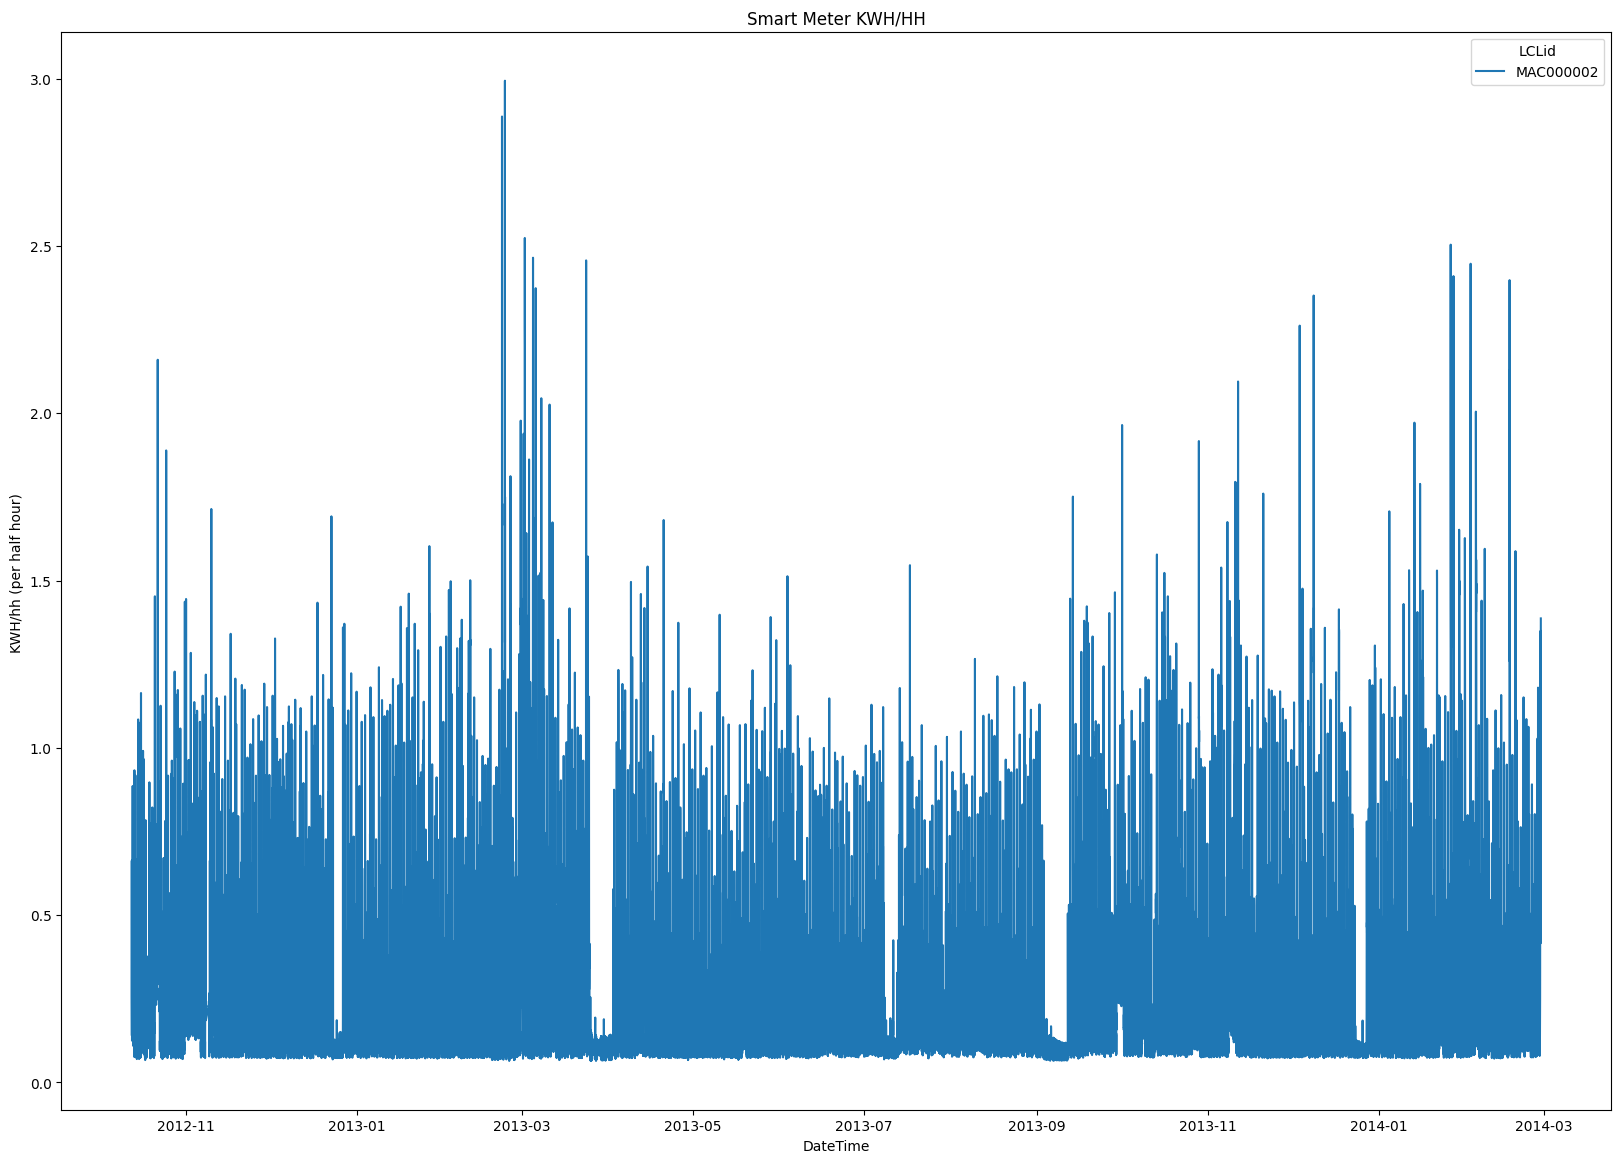

In [5]:


df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(20, 14))
sns.lineplot(x='DateTime', y='KWH/hh (per half hour) ', hue='LCLid', data=df)

plt.xlabel('DateTime')
plt.ylabel('KWH/hh (per half hour) ')
plt.title('Smart Meter KWH/HH')

plt.show()


In [6]:
df = alldata[alldata["LCLid"] == household ]
df.reset_index(drop=True, inplace=True)
print(df.head())

# order the weekdays and months correctly
df.loc[:,'weekday'] = pd.Categorical(df['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
df.loc[:,'month'] = pd.Categorical(df['month'], categories=calendar.month_name[1:], ordered=True)


# set energy consumption data to numeric type
df = df[df["KWH/hh (per half hour) "] != "Null"]
df.loc[:,"energy"] = df["KWH/hh (per half hour) "].astype("float64")

# calculate the cumulative energy use over time for each date
df.loc[:,"cumulative_sum"] = df.groupby('date')["energy"].cumsum()
df = df.set_index("datetime")
df.head()

       LCLid                     DateTime KWH/hh (per half hour) 
0  MAC000002  2012-10-12 00:30:00.0000000                      0 
1  MAC000002  2012-10-12 01:00:00.0000000                      0 
2  MAC000002  2012-10-12 01:30:00.0000000                      0 
3  MAC000002  2012-10-12 02:00:00.0000000                      0 
4  MAC000002  2012-10-12 02:30:00.0000000                      0 


KeyError: 'weekday'